In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

In [2]:
BASE_DIR = r"C:\Users\Varun\OneDrive\Pictures\Desktop\waste_classification_project\application"
model_path = os.path.join(BASE_DIR, "models", "final_waste_model_resnet.keras")
test_dir = os.path.join(BASE_DIR, "data", "split", "test")

In [3]:
model = load_model(model_path)
print(f"✅ ResNet model loaded successfully from: {model_path}")

✅ ResNet model loaded successfully from: C:\Users\Varun\OneDrive\Pictures\Desktop\waste_classification_project\application\models\final_waste_model_resnet.keras


In [4]:
IMG_SIZE = (224, 224)

In [5]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [6]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 3567 images belonging to 10 classes.


In [7]:
class_indices = test_generator.class_indices
# Map index to label:
idx_to_class = {v: k for k, v in class_indices.items()}
print("Classes:", idx_to_class)

Classes: {0: 'Electronic waste', 1: 'cardboard waste', 2: 'clothe waste', 3: 'glass waste', 4: 'metal waste', 5: 'organic waste', 6: 'paper waste', 7: 'plastic waste', 8: 'shoes waste', 9: 'trash'}


In [8]:
# Predict on the test set 
preds = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(preds, axis=1)
true_classes = test_generator.classes


c:\Users\Varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


112/112 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step


Classification Report:

                  precision    recall  f1-score   support

Electronic waste       0.99      0.96      0.98       318
 cardboard waste       0.96      0.97      0.97       381
    clothe waste       0.98      0.99      0.99       375
     glass waste       0.97      0.97      0.97       413
     metal waste       0.93      0.98      0.96       307
   organic waste       0.99      0.99      0.99       336
     paper waste       0.95      0.96      0.96       417
   plastic waste       0.98      0.95      0.97       439
     shoes waste       0.99      0.96      0.97       298
           trash       0.96      0.95      0.96       283

        accuracy                           0.97      3567
       macro avg       0.97      0.97      0.97      3567
    weighted avg       0.97      0.97      0.97      3567



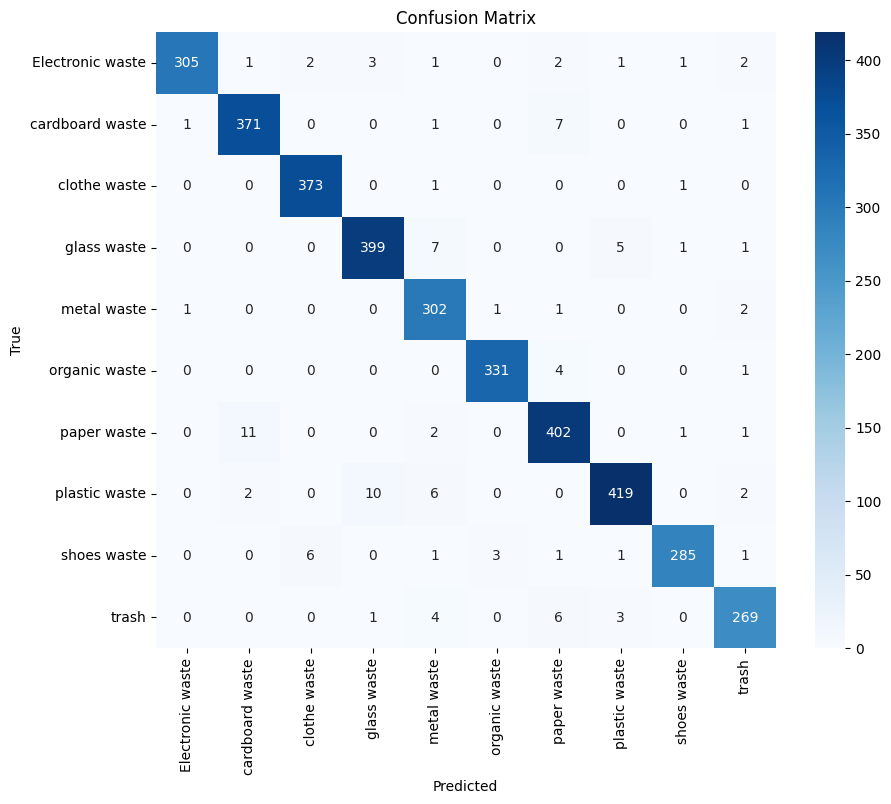

In [9]:
print("Classification Report:\n")
print(classification_report(true_classes, predicted_classes, target_names=list(class_indices.keys())))
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=list(class_indices.keys()), 
            yticklabels=list(class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Randomly select one image from folder Get all subfolders and files

Random image chosen: C:\Users\Varun\OneDrive\Pictures\Desktop\waste_classification_project\application\data\split\test\Electronic waste\pcb_119.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Predicted class: Electronic waste
Confidence: 100.00%


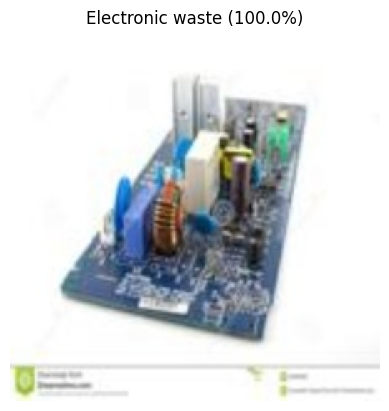

In [29]:
# Parameters 
IMG_SIZE = (224, 224)
test_dir = os.path.join(BASE_DIR, "data", "split", "test")

# Get all file paths from all subfolders
all_image_paths = []
for class_name in os.listdir(test_dir):
    class_folder = os.path.join(test_dir, class_name)
    if os.path.isdir(class_folder):
        for f in os.listdir(class_folder):
            if f.lower().endswith(('.jpg', '.jpeg', '.png')):
                all_image_paths.append(os.path.join(class_folder, f))

# Select a random image
random_img_path = random.choice(all_image_paths)
print("Random image chosen:", random_img_path)

# Load and preprocess
img = load_img(random_img_path, target_size=IMG_SIZE)
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Predict
pred = model.predict(img_array)
pred_class_index = np.argmax(pred, axis=1)[0]
confidence = np.max(pred) * 100

# Map index to class name (we already have idx_to_class from before)
predicted_class = idx_to_class[pred_class_index]

print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.2f}%")

# Display the image with predicted label
plt.imshow(load_img(random_img_path))
plt.title(f"{predicted_class} ({confidence:.1f}%)")
plt.axis('off')
plt.show()
